# **SONG RECOMMENDER**

### MARIA KOILALOU - JUSTINE LE BOURGE 

**GROUP 11**

Project for Artificial Intelligence [EARIN] Summer 2023

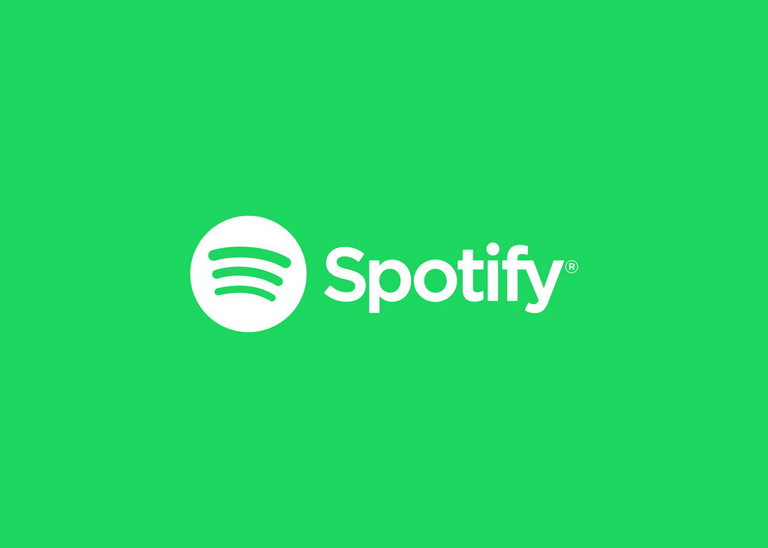

## **PROBLEM DEFINITION**

Our project aims to develop a sophisticated Song Recommender System using Spotify datasets. The goal is to create a model that can provide song recommendations to users based on the song's characteristics. By analyzing the information provided by the datasets, we will identify the key attributes that determine whether a user will like a song or not.

In this project we are going to develop a program that uses some Spotify datasets. Spotify is a song streaming app and platform that most people use and almost every artist uploads their songs there. We will start by exploring the Spotify datasets, which contain extensive information on songs, artists, and song characteristics, including popularity data. These datasets will serve as a valuable resource for training our models.

First in our project we are going to examine the datasets. The songs, the artists and the characteristics of the songs and the relationship between them.
Based on the user's input we are going to search for similar song's that he might enjoy.

In our project we are going to use Python Notebooks for a quicker way to examine data.

We import the necessary libraries to start our analysis:

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import altair as alt
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
alt.renderers.enable('kaggle')
warnings.simplefilter("ignore")

## **Dataset**
## Overview

First we are going to examine the whole dataset and create some graphs and tables with helpful information about the data that we are going to use later.

In [43]:
# Read Dataset
data = pd.read_csv("/kaggle/input/spotifyclassification/data.csv")

In [44]:
# Print the Start of the Dataset to examine the datas
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


We notice that the first column of the Dataset is empty so we fix it not to be unnamed. We also erase 'target' value because we aren't going to use it for our analysis. The model is going to use unsupervised learning techniques so it won;t need a 'target' variable.

In [45]:
# Fix Unnamed column's name
data = data.drop("Unnamed: 0", axis="columns")
# Drop unnecessary 'target' column
data.drop('target', axis=1, inplace=True)

In [46]:
# Drop duplicate values
data = data.drop_duplicates()

In [47]:
# Check for null values in the DataFrame
data.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
dtype: int64

In [48]:
# Print the type of every attribute of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2016
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2009 non-null   float64
 1   danceability      2009 non-null   float64
 2   duration_ms       2009 non-null   int64  
 3   energy            2009 non-null   float64
 4   instrumentalness  2009 non-null   float64
 5   key               2009 non-null   int64  
 6   liveness          2009 non-null   float64
 7   loudness          2009 non-null   float64
 8   mode              2009 non-null   int64  
 9   speechiness       2009 non-null   float64
 10  tempo             2009 non-null   float64
 11  time_signature    2009 non-null   float64
 12  valence           2009 non-null   float64
 13  song_title        2009 non-null   object 
 14  artist            2009 non-null   object 
dtypes: float64(10), int64(3), object(2)
memory usage: 251.1+ KB


We check some basic information about the attribute’s values such as total count, mean, minimum and maximum value:

In [49]:
# Basic description of the dataset
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2009.000000,2009.000000,2.009000e+03,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,0.187710,0.618218,2.461865e+05,0.682004,0.133167,5.347437,0.190681,-7.074358,0.612743,0.092257,121.614624,3.968143,0.497320
std,0.259829,0.160989,8.201738e+04,0.210281,0.273127,3.649312,0.155387,3.758714,0.487245,0.089033,26.678969,0.256355,0.247118
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800
25%,0.009470,0.514000,1.999730e+05,0.564000,0.000000,2.000000,0.092200,-8.390000,0.000000,0.037500,100.189000,4.000000,0.296000
50%,0.063700,0.631000,2.290930e+05,0.716000,0.000075,6.000000,0.126000,-6.246000,1.000000,0.054900,121.427000,4.000000,0.493000
75%,0.265000,0.738000,2.698670e+05,0.846000,0.054000,9.000000,0.246000,-4.741000,1.000000,0.108000,137.644000,4.000000,0.692000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000


In [50]:
# Print the size of the Dataset 
data.shape

(2009, 15)

We start to examine the **artists** that are included in our dataset

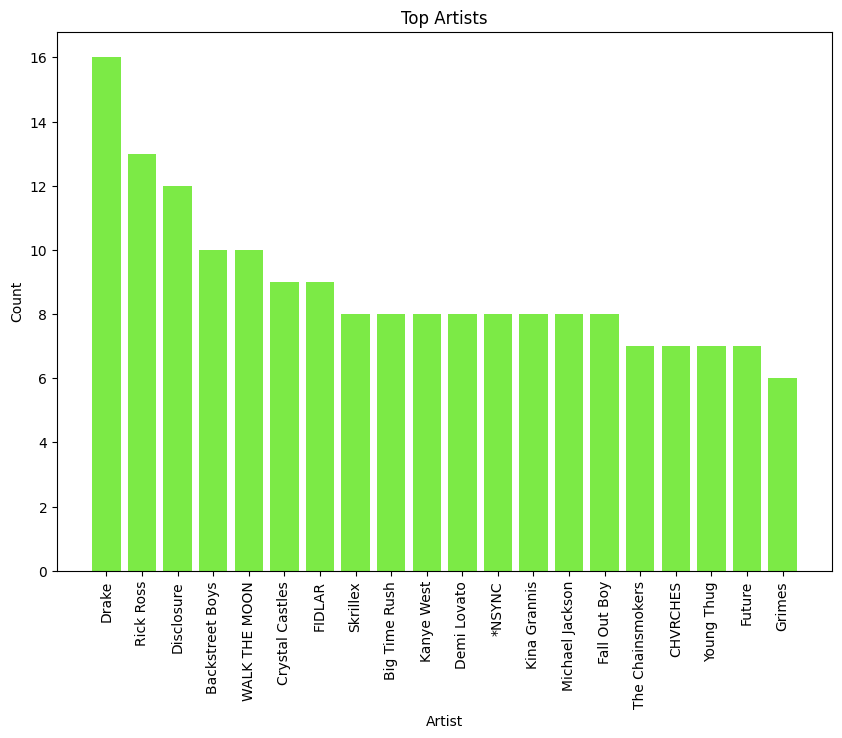

In [51]:
# Set the title and axis labels
values = data['artist'].value_counts().tolist()[:20]
names = list(dict(data['artist'].value_counts()).keys())[:20]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 7))  # smaller figsize
ax.bar(names, values, color="#7CEA46")

# Set the title and axis labels
ax.set_title("Top Artists")
ax.set_xlabel("Artist")
ax.set_ylabel("Count")

# Display the plot
plt.xticks(rotation=90)
plt.show()


We print the **Correlation Matrix** of the dataset to find the correlation between the attributes. The ones with the higher correlation are the ones that we need to check because they will probably be important for the analysis.

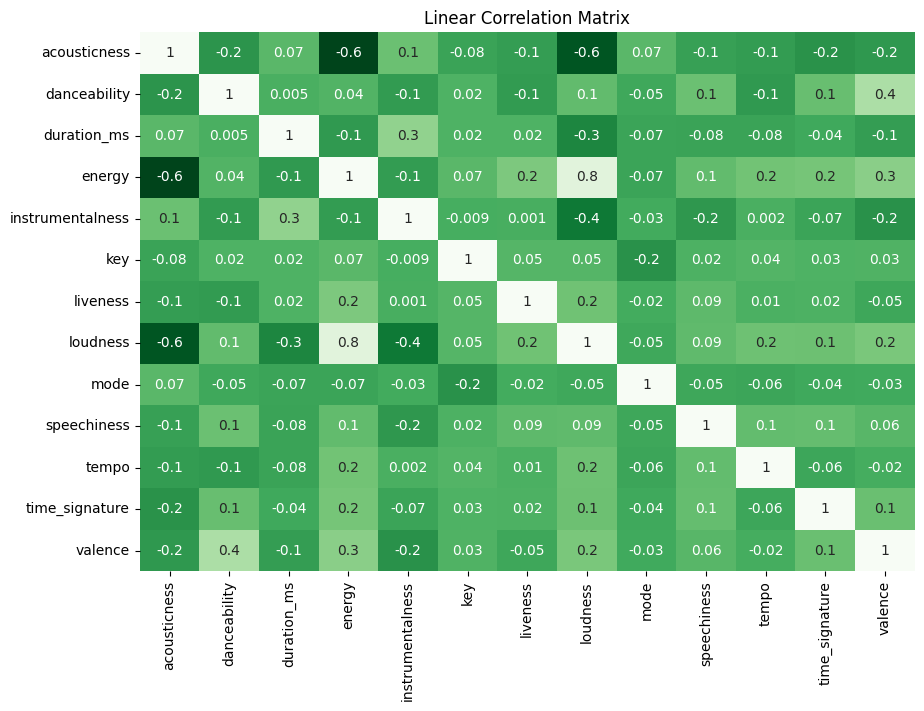

In [52]:
# Plot linear correlation matrix
numeric_data = data.drop(['song_title', 'artist'], axis=1)
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False)
plt.title('Linear Correlation Matrix')
plt.show()

In [53]:
# Check absolute correlation
corr_df = data.corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr', scale=alt.Scale(scheme='blueorange', domain=(-1, 1))))

alt.Chart(...)

In [54]:
# Numeric Data
numeric_data = data.select_dtypes(include=[np.number])

numeric_data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [55]:
#Categorical Data
categorical_data = data.select_dtypes(include=[np.object])

categorical_data.columns

Index(['song_title', 'artist'], dtype='object')

We use **heatmap** to review the correlation more clearly. We notice that there are some pairs that have larger absolute correlation than most of the others such as : 
* *loudness* and *energy*, 
* *acousticness* and *energy*, 
* *valence* and *danceability*

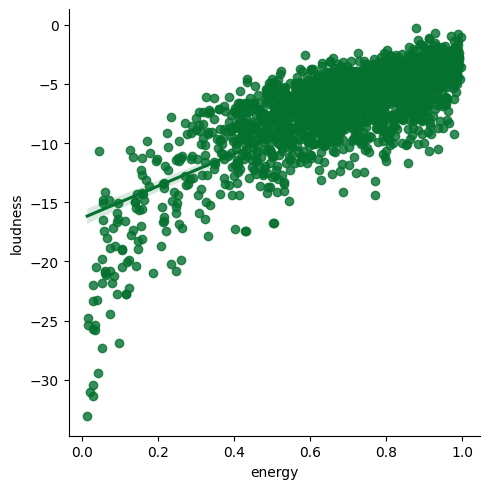

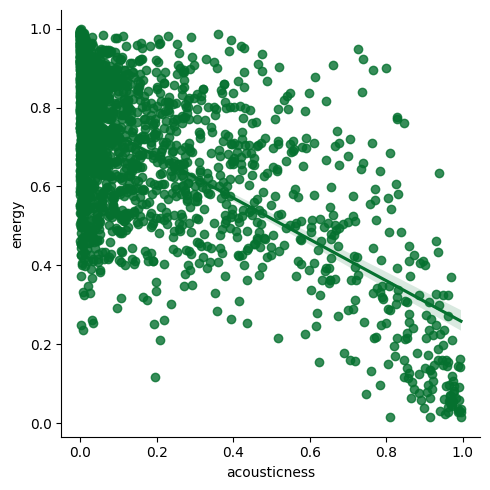

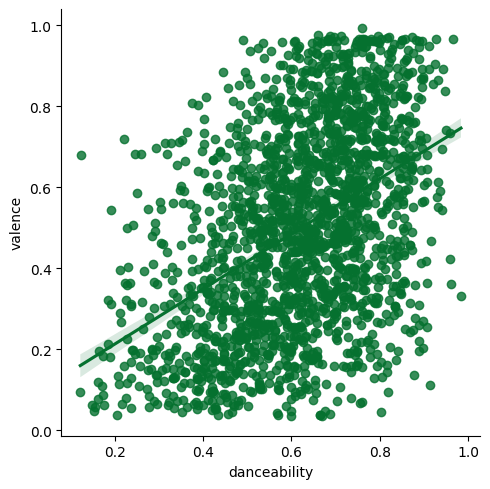

In [56]:
# Scatter chart for "loudness" and "energy"
sns.lmplot(y='loudness', x='energy', data=data, palette='BuGn')

# Scatter chart for "acousticness" and "energy"
sns.lmplot(y='energy', x='acousticness', data=data, palette='BuGn')

# Scatter chart for "valence" and "danceability"
sns.lmplot(y='valence', x='danceability', data=data, palette='BuGn')

We notice that *valence* and *danceability* don't seem to have such a strong correlation so we don't create new attributes for them

In [57]:
# Create new attributes
data['energy_loudness_ratio'] = data['energy'] / data['loudness']
data['energy_acousticness_ratio'] = data['energy'] / data['acousticness']
# Append the new features to numeric_data
numeric_data = pd.concat([numeric_data, data[['energy_loudness_ratio', 'energy_acousticness_ratio']]], axis=1)

We print **Histograms** for all the numeric columns to check the values of each attribute

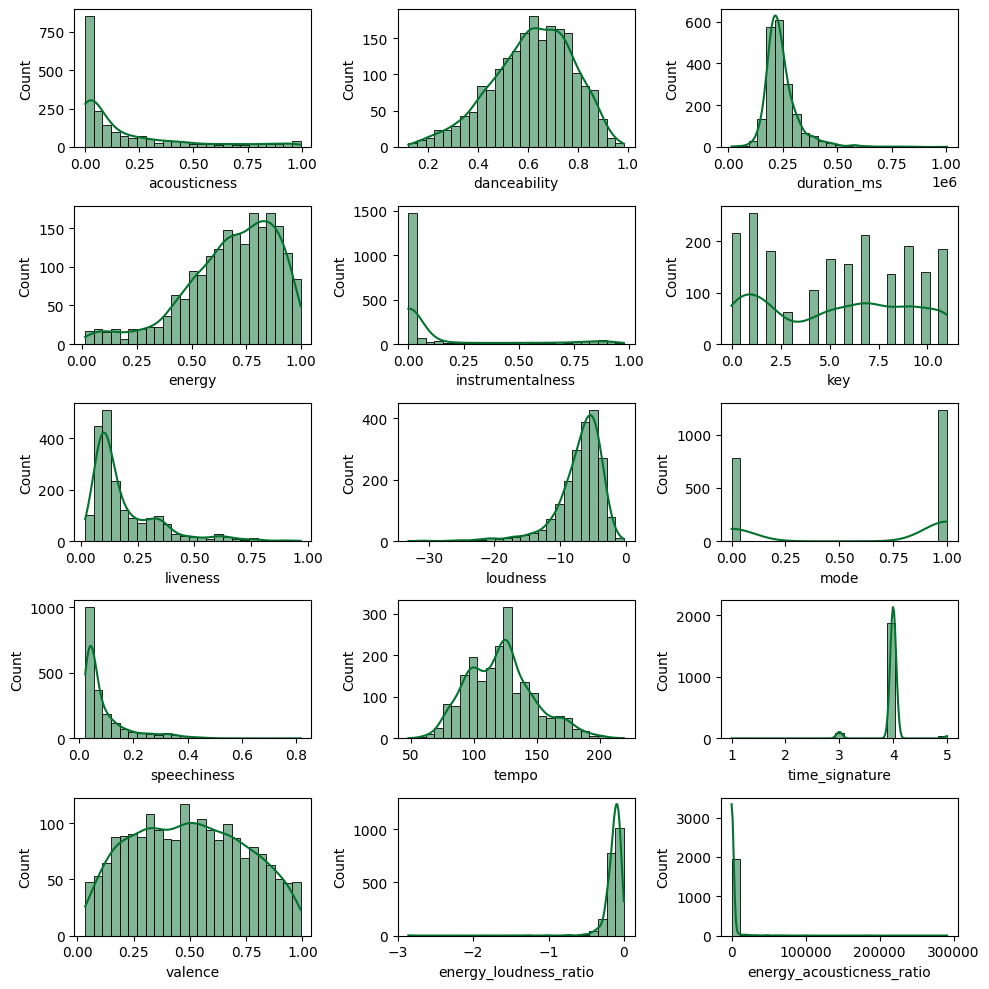

In [58]:
sns.set_palette("Greens_r")
num_cols = data.select_dtypes(include="number").columns
fig, axes = plt.subplots(5, 3, figsize=(10, 10))
axes = axes.flatten()
ax_no = 0
for col in num_cols:
    sns.histplot(data=data, x=col, bins=25, kde=True, ax=axes[ax_no])
    ax_no += 1
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

## Pre-processing

We clean the data so we feed only the important variables on the model

We notice that some attributes such as *mode*, *time_signature* and *energy_acousticness_ratio* don't have different values between the different songs on the dataset so they are not defined characteristics that we need for our analysis.

In [59]:
data.drop('mode', axis=1, inplace=True)
data.drop('time_signature', axis=1, inplace=True)
data.drop('energy_acousticness_ratio', axis=1, inplace=True)

In [60]:
# Continuous Columns
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
                   'liveness', 'loudness', 'tempo', 'valence', 'speechiness', 'instrumentalness','energy_loudness_ratio']

In [61]:
# Discrete Columns
discrete_cols = ['key']

We scale the continuous data of the dataset

In [62]:
# Create a StandardScaler object
scaler = StandardScaler()
# Apply scaling to the numeric features
scaled_features = scaler.fit_transform(numeric_data[continuous_cols])

# Create a new DataFrame with the scaled numeric features
data[continuous_cols] = pd.DataFrame(scaled_features, columns=data[continuous_cols].columns)

We perform One-Hot Encoding for the discrete data in our dataset.

In [63]:
# Perform one-hot encoding
one_hot_encoded_data = pd.get_dummies(data, columns=discrete_cols, drop_first=True)
data = pd.concat([data.drop(columns=discrete_cols), one_hot_encoded_data], axis=1)

# Check for duplicate columns
duplicate_columns = data.columns[data.columns.duplicated()]

# Drop duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

data = data.dropna()

# Numeric Data
numeric_data = data.select_dtypes(include=[np.number])

numeric_data.columns

# Print the DataFrame after dropping duplicate columns
print(data)

      acousticness  danceability  duration_ms    energy  instrumentalness  \
0        -0.683353      1.334474    -0.507172 -1.179686         -0.407484   
1         0.043461      0.775291     0.984749 -1.536441         -0.465311   
2        -0.590191      1.365539    -0.737583 -1.284334         -0.486830   
3         1.602569     -0.771781    -0.570430 -1.636332          1.380040   
4        -0.029682      0.371437     1.789169 -0.575581          1.387364   
...            ...           ...          ...       ...               ...   
2004     -0.718538     -0.212598     0.344128  1.189166         -0.477835   
2005     -0.385005      1.713475    -0.780572  0.998897         -0.481571   
2006     -0.689627      0.116698    -0.475463  1.203436         -0.473074   
2007     -0.716306     -0.380353    -0.738888  1.474570          1.991629   
2008     -0.711801     -1.070011    -0.508147  1.108301         -0.487545   

      liveness  loudness  speechiness     tempo   valence  ... key_2 key_3 

We print the attributes with the highest explained variance in descending order so we figure the importance of each attribute inside a dataset.

In [64]:
n_components = 15  # Number of components to keep

pca = PCA(n_components=n_components)
pca.fit(numeric_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Get the indices of the components with the highest explained variance in descending order
top_components_indices = np.argsort(explained_variance_ratio)[::-1][:n_components]

# Get the corresponding column names
sorted_attributes_pca = [numeric_data.columns[i] for i in top_components_indices]

# Create a DataFrame with the sorted attributes from PCA
final_attributes_pca = pd.DataFrame({'Attributes': sorted_attributes_pca})

# Print the final DataFrame
print(final_attributes_pca)

               Attributes
0            acousticness
1            danceability
2             duration_ms
3                  energy
4        instrumentalness
5                liveness
6                loudness
7             speechiness
8                   tempo
9                 valence
10  energy_loudness_ratio
11                  key_1
12                  key_2
13                  key_3
14                  key_4


We keep the 10 most important attributes of the dataset:

In [65]:
# Get the top 10 attributes from PCA
pca_top_attributes = sorted_attributes_pca[:10]

# Get the 8 attributes with the highest importance based on their position in the combined list
final_attributes = pca_top_attributes[:10]

# Print the final attributes
for attribute in final_attributes:
    print(attribute)

acousticness
danceability
duration_ms
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence


We create the new data frame with only the most important attributes:

In [66]:
# Select the relevant columns from numeric_data
pca_data = numeric_data[final_attributes]

# Add the 'artist' and 'song_title' columns from the data DataFrame
pca_data.insert(0, 'song_title', data['song_title'])
pca_data.insert(1, 'artist', data['artist'])

new_data = pca_data.dropna()
new_data.head()

,song_title,artist,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Mask Off,Future,-0.683353,1.334474,-0.507172,-1.179686,-0.407484,-0.165313,-0.457888,3.805626,1.066550,-0.855352
1,Redbone,Childish Gambino,0.043461,0.775291,0.984749,-1.536441,-0.465311,-0.345553,-0.885268,-0.144439,1.442258,0.367042
2,Xanny Family,Future,-0.590191,1.365539,-0.737583,-1.284334,-0.486830,-0.203936,-0.019597,2.210321,-1.746028,-1.312737
3,Master Of None,Beach House,1.602569,-0.771781,-0.570430,-1.636332,1.380040,-0.633936,-2.171933,-0.743240,-1.317719,-1.082021
4,Parallel Lines,Junior Boys,-0.029682,0.371437,1.789169,-0.575581,1.387364,1.598462,-1.217113,-0.256784,1.964185,1.646103


We perform PCA dimensional reduction to the attributes:

In [67]:
# Perform PCA for dimensional reduction
n_components = 10  # Number of components to keep
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(new_data.iloc[:, 2:])  # Exclude 'song_title' and 'artist' columns

# Convert the reduced_data back to a DataFrame
reduced_data_pca = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
reduced_data_pca.insert(0, 'song_title', pca_data['song_title'])
reduced_data_pca.insert(1, 'artist', pca_data['artist'])
reduced_data_pca = reduced_data_pca.dropna()
reduced_data_pca.head()

,song_title,artist,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Mask Off,Future,-0.377790,-0.819423,-1.488999,3.634478,-0.704745,1.415111,-0.589508,-1.128672,0.376105,-0.384681
1,Redbone,Childish Gambino,1.002715,-0.800291,0.004221,0.750283,-1.264797,-0.488989,1.448783,-0.839400,0.509487,-0.418384
2,Xanny Family,Future,0.146192,-1.381900,-0.793918,1.506959,1.382646,2.231148,-1.019401,-1.123041,0.065210,-0.567266
3,Master Of None,Beach House,3.699711,-0.155546,-0.462886,-0.727139,0.497671,0.052561,-1.341354,-0.041816,0.246766,0.283453
4,Parallel Lines,Junior Boys,0.758668,0.413775,1.910776,1.613494,-1.115955,-2.555866,0.869719,-0.239347,0.757377,-0.288095


# *Technical Approach*
## Architecture

K-means is a clustering algorithm that aims to partition data points into a specified number of clusters (k) based on their similarity. It operates by iteratively assigning data points to the nearest centroid and updating the centroids based on the mean of the assigned points. This process continues until convergence is reached, resulting in k clusters with the centroids representing the cluster centers.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is another clustering algorithm that groups together data points based on their density. It defines clusters as areas of high-density separated by areas of low-density. DBSCAN requires two parameters: epsilon (eps), which specifies the radius of the neighborhood around a data point, and min_samples, which determines the minimum number of data points within the epsilon radius to form a dense region.

Both K-means and DBSCAN have their advantages and limitations. K-means is a centroid-based algorithm that works well when the clusters have a spherical shape and are of similar size. It is sensitive to the initial placement of centroids and may converge to suboptimal solutions. DBSCAN, on the other hand, is density-based and can discover clusters of arbitrary shapes. It is robust to noise and can handle clusters of different sizes. However, it requires tuning of parameters and may struggle with high-dimensional data.

## Training details

First we input a song title and search if the song exists in our dataset.
If there are multiple songs with this name we ask the user to input the artist's name.

In [72]:
# Assume df is your DataFrame and 'song_title' and 'artist_name' are your columns
user_input = input("Enter a song title: ").strip().lower()

# Convert the 'song_title' column to lower case
reduced_data_pca['song_title'] = reduced_data_pca['song_title'].str.lower()
reduced_data_pca['artist'] = reduced_data_pca['artist'].str.lower()

# Search in the lower case column
matched_songs = reduced_data_pca[reduced_data_pca['song_title'] == user_input_song]

if len(matched_songs) > 1:
    print("Multiple songs with that title found. Please specify the artist.")
    user_input_artist = input("Enter an artist name: ").strip().lower()
    
    # Create the 'artist_name_lower' column in the 'matched_songs' DataFrame
    matched_songs['artist'] = matched_songs['artist'].str.lower()
    
    matched_songs = matched_songs[matched_songs['artist'] == user_input_artist]
    matched_songs.drop(columns=['song_title', 'artist'], inplace=True)

elif len(matched_songs) == 1:
    print("Song found!")
    matched_songs.drop(columns=['song_title'], inplace=True)
    
else:
    print("Song not found.")


Enter a song title:  mercy


Multiple songs with that title found. Please specify the artist.


Enter an artist name:  Kanye west


### We calculate the similarity between the song's of the same cluster:

In [69]:
def calculate_similarity_kmeans(user_input_title):
    # Get the user song's features, artist, and cluster
    user_song = reduced_data_pca[reduced_data_pca['song_title'] == user_input_title].iloc[0]
    user_artist = user_song['artist']
    user_features = user_song[2:-1]  # Exclude 'song_title', 'artist', and 'cluster_label' columns
    user_cluster = user_song['cluster_label_kmeans']

    # Get the songs within the user song's cluster
    cluster_data = reduced_data_pca[reduced_data_pca['cluster_label_kmeans'] == user_cluster]

    # Calculate similarity within the user song's cluster
    similarity_scores = cosine_similarity([user_features], cluster_data.iloc[:, 2:-1])[0]

    # Set similarity score to 1 if song is by the same artist AND not the same song
    same_artist_indices = (cluster_data['artist'] == user_artist)
    similarity_scores[same_artist_indices] = 1

    # Sort songs in descending order of similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1]

    return similarity_scores, sorted_indices

In [70]:
# Function to calculate similarity between input song and songs within the same cluster
def calculate_similarity_dbscan(user_input_title):
    # Get the user song's features, artist, and cluster
    user_song = reduced_data_pca[reduced_data_pca['song_title'] == user_input_title].iloc[0]
    user_artist = user_song['artist']
    user_features = user_song[2:-1]  # Exclude 'song_title', 'artist', and 'cluster_label' columns
    user_cluster = user_song['cluster_label_dbscan']

    # Get the songs within the user song's cluster
    cluster_data = reduced_data_pca[reduced_data_pca['cluster_label_dbscan'] == user_cluster]

    # Calculate similarity within the user song's cluster
    similarity_scores = cosine_similarity([user_features], cluster_data.iloc[:, 2:-1])[0]

    # Set similarity score to 1 if song is by the same artist AND not the same song
    same_artist_indices = (cluster_data['artist'] == user_artist)
    similarity_scores[same_artist_indices] = 1

    # Sort songs in descending order of similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1]

    return similarity_scores, sorted_indices

## K-Means Algorithm

In [73]:
# Perform clustering using KMeans algorithm
n_clusters = 15  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(reduced_data_pca.iloc[:, 2:].values)

# Add the cluster labels as a new column in the reduced_data DataFrame
reduced_data_pca['cluster_label_kmeans'] = cluster_labels_kmeans

# Function to recommend similar songs based on user input
def recommend_similar_songs_kmeans(user_input_title):
    # Calculate similarity within the user song's cluster
    similarity_scores, sorted_indices = calculate_similarity_kmeans(user_input_title)

    # Exclude the user input song from the recommendations
    sorted_indices = sorted_indices[:10]

    # Find the cluster label of the user input song
    user_song_cluster = reduced_data_pca.loc[reduced_data_pca['song_title'] == user_input_title, 'cluster_label_kmeans'].values[0]
    
    # Get the songs within the user song's cluster
    cluster_songs = reduced_data_pca[reduced_data_pca['cluster_label_kmeans'] == user_song_cluster]

    # Get the most similar songs within the user song's cluster
    similar_songs = cluster_songs.iloc[sorted_indices]

    # Sort the similar songs based on similarity scores
    similarity_percentages = similarity_scores[sorted_indices] * 100  # Convert to percentages
    similar_songs = similar_songs.assign(similarity=similarity_percentages)
    similar_songs = similar_songs.sort_values('similarity', ascending=False)
    return similar_songs[['song_title', 'artist', 'similarity']]

# Example usage
recommended_songs_kmeans = recommend_similar_songs_kmeans(user_input)
print(recommended_songs_kmeans)

                                      song_title         artist  similarity
201                                        mercy     kanye west  100.000000
998                father stretch my hands pt. 1     kanye west  100.000000
1612                      cascade - original mix    tommy trash   95.364316
982                                        weary        solange   95.050830
0                                       mask off         future   89.878638
456                                computer love           zapp   88.632614
148                                        river          ibeyi   88.582546
961                                    hung over  the martini's   88.143834
924                                 muzik xpress      x-press 2   87.862199
609   reckless (with your love) - tensnake remix    azari & iii   87.571054


## DBSCAN Clustering

In [74]:
# Perform DBSCAN clustering
eps = 2 # Radius of the neighborhood
min_samples = 10  # Minimum number of samples in a neighborhood to form a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels_dbscan = dbscan.fit_predict(reduced_data_pca.iloc[:, 2:].values)

# Add the cluster labels as a new column in the reduced_data_pca DataFrame
reduced_data_pca['cluster_label_dbscan'] = cluster_labels_dbscan

# Function to recommend similar songs based on user input
def recommend_similar_songs_dbscan(user_input_title):
    # Find the cluster label of the user input song
    user_song_cluster = reduced_data_pca.loc[reduced_data_pca['song_title'] == user_input_title, 'cluster_label_dbscan'].values[0]

    # Get the songs within the user song's cluster
    cluster_songs = reduced_data_pca[reduced_data_pca['cluster_label_dbscan'] == user_song_cluster]

    # Calculate similarity within the user song's cluster
    similarity_scores, sorted_indices = calculate_similarity_dbscan(user_input_title)

    # Exclude the user input song from the recommendations
    sorted_indices = sorted_indices[:10]

    # Get the most similar songs within the user song's cluster
    similar_songs = cluster_songs.iloc[sorted_indices]

    # Sort the similar songs based on similarity scores
    similarity_percentages = similarity_scores[sorted_indices] * 100  # Convert to percentages
    similar_songs = similar_songs.assign(similarity=similarity_percentages)
    similar_songs = similar_songs.sort_values('similarity', ascending=False)
    similar_songs.dropna()
    return similar_songs[['song_title', 'artist', 'similarity']]

# Example usage
recommended_songs_dbscan = recommend_similar_songs_dbscan(user_input)
print(recommended_songs_dbscan)

                         song_title         artist  similarity
998   father stretch my hands pt. 1     kanye west  100.000000
201                           mercy     kanye west  100.000000
1612         cascade - original mix    tommy trash   99.021004
456                   computer love           zapp   98.214495
961                       hung over  the martini's   97.764868
872               oogum boogum song   brenton wood   97.706123
355                     nimble girl     hotel eden   97.638260
924                    muzik xpress      x-press 2   97.605248
340                   cadillac girl      only real   97.544621
0                          mask off         future   97.466628


# *Evaluation*

We perform t-SNE to reduce dimensionality and visualize the clusters for each algorith:

In [75]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(reduced_data_pca.iloc[:, 2:-2])  # Exclude 'song_title', 'artist', 'cluster_label' columns

# Create a DataFrame for t-SNE visualization
tsne_df = pd.DataFrame(data={
    'X': transformed_data[:, 0],
    'Y': transformed_data[:, 1],
    'Cluster_Kmeans': reduced_data_pca['cluster_label_kmeans'],
    'Cluster_DBSCAN': reduced_data_pca['cluster_label_dbscan']
})


We then visualize the clusters to check if the algorithms are working in an efficient way.

The silhouette score ranges from -1 (worst) to +1 (best), with 0 suggesting overlapping clusters. A score below 0 indicates that samples might have been assigned to the wrong cluster. In your case, a silhouette score of 0.326 suggests that the clustering solution is reasonable, but there may be some overlap among clusters.

The Calinski-Harabasz Index is calculated as the ratio of the sum of between-cluster dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared). The score is dependent on the dataset and the clustering algorithm, so it's not easy to give a definitive threshold for what a "good" score is.

### K-means Evaluation

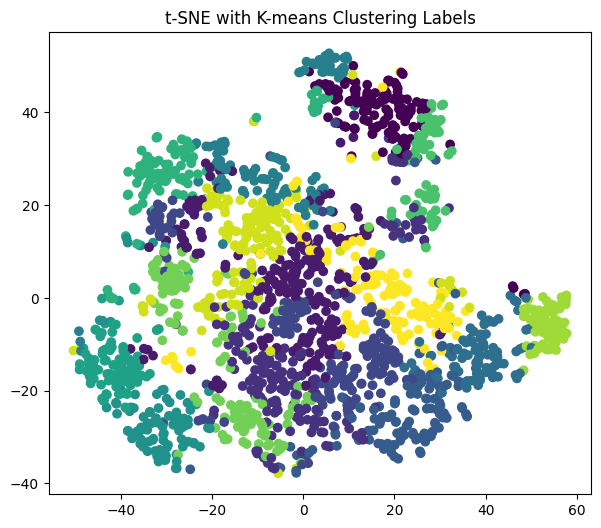

Silhouette Coefficient: 0.24757449161332204
Calinski-Harabasz Index: 675.5920690115524


In [76]:
# Visualize K-means clustering results
plt.figure(figsize=(7, 6))
plt.scatter(tsne_df['X'], tsne_df['Y'], c=tsne_df['Cluster_Kmeans'], cmap='viridis')
plt.title('t-SNE with K-means Clustering Labels')
plt.show()

# Calculate Silhouette Coefficient
silhouette_score = metrics.silhouette_score(reduced_data_pca.iloc[:, 2:], cluster_labels_kmeans)
print(f'Silhouette Coefficient: {silhouette_score}')

# Calculate Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(reduced_data_pca.iloc[:, 2:], cluster_labels_kmeans)
print(f'Calinski-Harabasz Index: {calinski_harabasz_score}')


### DBSCAN Evaluation

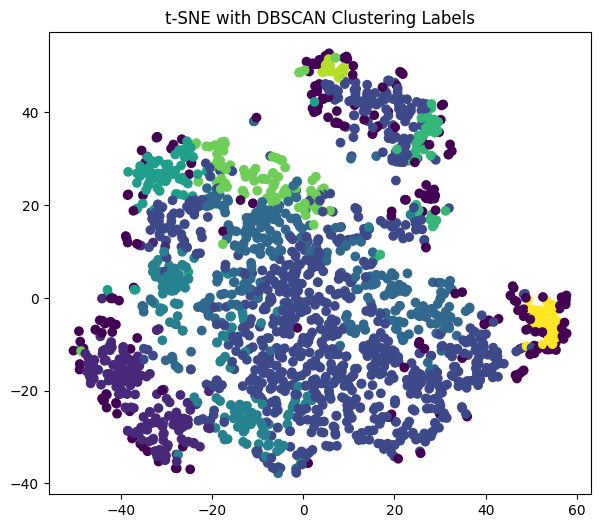

Silhouette Coefficient: 0.34890044053694197
Calinski-Harabasz Index: 586.2771306264694


In [77]:
# Visualize DBSCAN clustering results
plt.figure(figsize=(7, 6))
plt.scatter(tsne_df['X'], tsne_df['Y'], c=tsne_df['Cluster_DBSCAN'], cmap='viridis')
plt.title('t-SNE with DBSCAN Clustering Labels')
plt.show()

# Calculate Silhouette Coefficient
silhouette_score = metrics.silhouette_score(reduced_data_pca.iloc[:, 2:], cluster_labels_dbscan)
print(f'Silhouette Coefficient: {silhouette_score}')

# Calculate Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(reduced_data_pca.iloc[:, 2:], cluster_labels_dbscan)
print(f'Calinski-Harabasz Index: {calinski_harabasz_score}')


## Subjective Prespective

To test the results we can use our subjective perspective. We perform the code for 3 different songs:

* HUMBLE. - Kendrick Lamar
* Immortals - Fall Out Boy
* Stiches - Shawn Mendes



### HUMBLR - Kendrick Lamar

In [78]:
user_input = 'HUMBLE.'.strip().lower()
print("K-means: ")
recommended_songs_kmeans = recommend_similar_songs_kmeans(user_input)
print(recommended_songs_kmeans)
print("DBSCAN: ")
recommended_songs_dbscan = recommend_similar_songs_dbscan(user_input)
print(recommended_songs_dbscan)

K-means: 
                             song_title          artist  similarity
1162                            humble.  kendrick lamar  100.000000
1012  bad boys (feat. ghetts and j hus)         stormzy   98.386945
1992                           portugal   walk the moon   97.659561
1011                      t on the wing     president t   97.154465
1024                        craving you    thomas rhett   96.768791
1158         whippin (feat. felix snow)          kiiara   96.116415
1677                               help      papa roach   95.832159
1033                              roots  zac brown band   95.573501
366                           norf norf   vince staples   95.437947
1132                          immortals    fall out boy   95.320004
DBSCAN: 
                                     song_title          artist  similarity
1162                                    humble.  kendrick lamar  100.000000
662                                m.a.a.d city  kendrick lamar  100.000000
421  

In this occasion DBSCAN gives us a better result because it recommends other Kendrick Lamar's songs that the user will probably enjoy if they like HUMBLE. .
From these recommendations the ones that in my prespective are valid are: 
* Bad Boys - Stormzy
* T on the Wing - President T
* Norf Norf - Staples
They other ones are different genres of the input song and so not a very good recommendation.


### Immortals - Fall Out Boy

In [79]:
user_input = 'Immortals'.strip().lower()
print("K-means: ")
recommended_songs_kmeans = recommend_similar_songs_kmeans(user_input)
print(recommended_songs_kmeans)
print("DBSCAN: ")
recommended_songs_dbscan = recommend_similar_songs_dbscan(user_input)
print(recommended_songs_dbscan)

K-means: 
                            song_title          artist  similarity
1132                         immortals    fall out boy  100.000000
1133                       uma thurman    fall out boy  100.000000
1140   there's nothing holdin' me back    shawn mendes   98.236562
1158        whippin (feat. felix snow)          kiiara   97.751880
1677                              help      papa roach   97.694483
366                          norf norf   vince staples   97.025086
1467                              help         borgore   96.258849
1905                           fantasy    mariah carey   95.826320
1740  tearin' up my heart - radio edit          *nsync   95.630772
1162                           humble.  kendrick lamar   95.320004
DBSCAN: 
                                 song_title         artist  similarity
1134                           dance, dance   fall out boy  100.000000
1129                 sugar, we're goin down   fall out boy  100.000000
1132                           

In this case I find the results better with much more similar songs. Maybe this genre of music is easier to be represented by the attributes our dataset has.
Again DBSCAN recommends more songs of the same artist which is again a very good practice for always recommending something the user would enjoy, but maybe in this situation it doesn't recommend enough different songs for the user to actually discover new music.

### Stitches - Shawn Mendes

In [ ]:
user_input = 'Stitches'.strip().lower()
print("K-means: ")
recommended_songs_kmeans = recommend_similar_songs_kmeans(user_input)
print(recommended_songs_kmeans)
print("DBSCAN: ")
recommended_songs_dbscan = recommend_similar_songs_dbscan(user_input)
print(recommended_songs_dbscan)

Here we see we don't have songs from the same artist recommended in any of the two clustering methods. The songs that are recommended by both methods are less mainstream songs that the user might not find interesting because they are older than the input song. This indicates that the set of attributes we used might lack some important characteristics of the songs such as their release date which plays an important role to the audience a song attracks.  